# Homework 5. K-means and Recommendation system

#### You must run all cells in Google colab for this homework

***Double Click here to edit this cell***

- Name: 김대현
- Student ID: 202000449
- Submission date: 24.06.11

## Problem 1 (10 pts): K-means : 10

- We want to cluster data in sample_data_1.csv
- Estimate the best k for sample_data_1.csv
- You must show the process to find the best k
- use `sklearn.cluster.KMeans`

- 우리는 `sample_data_1.csv`의 데이터를 클러스터링하고자 합니다.
- `sample_data_1.csv`에 대한 최적의 k 값을 추정하세요.
- 최적의 k 값을 찾는 과정을 보여주세요.
- `sklearn.cluster.KMeans`를 사용하세요.

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


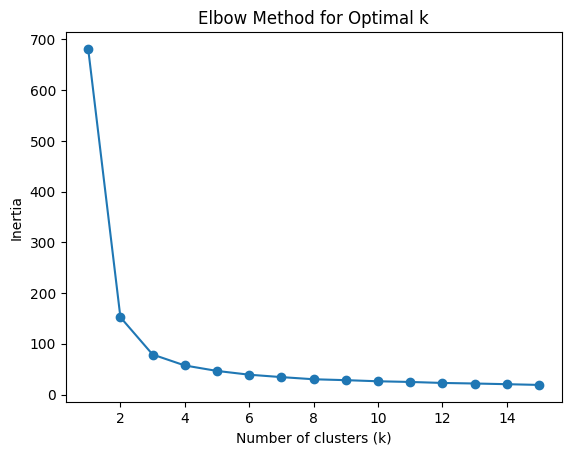

In [ ]:
# YOUR CODE HERE. You may use as many code cells as you want.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 로드
file_path = '/content/sample_data_1.csv'
data = pd.read_csv(file_path, header=None)  # 데이터 파일에 헤더가 없다고 가정합니다

# 데이터 확인
print(data.head())

# k 값의 범위 설정
k_values = range(1, 16)
inertia_values = []

# 각 k 값에 대해 KMeans 클러스터링 수행 및 비용 함수 계산
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(data)
    inertia_values.append(kmeans.inertia_)

# 엘보우 방법을 사용하여 최적의 k 값 찾기
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


### Your conclusion:
```
To edit, double-click here
그래프에서 k=1에서 k=3으로 이동할 때 Inertia가 급격히 감소합니다.
k=3 이후로는 Inertia의 감소 폭이 현저히 줄어들고, 그래프가 완만해집니다.
따라서, 최적의 k 값은 3으로 추정할 수 있습니다. 이는 데이터가 3개의 클러스터로 가장 잘 나누어질 수 있음을 의미합니다.

```

## Problem 2 (40 pts): K-means implementation : 30

- Make your own implementaion of K-means algorithm
- If the sum of distances between previous centroids and current centroids is less than or equal to `EPSILON`, K-means stops.
- If K-means algorithm reaches the maximum number of iterations `max_iter`, it stops.
- In `fit` method, you must run k-means in `n_init` times with different centroid seeds. Then choose the best.
- `fit` method computes centroids and labels and stores them in `self.cluster_centers_` and `self.labels_`
- `predict` method returns the centroids closest to each point in `X`
- `score` method returns **the negative of** the sum of sqaured distances between each point in `X` and the centroid closest to the point.

- 이전 중심점과 현재 중심점 사이의 거리 합이 `EPSILON` 이하이면 K-means가 멈춥니다.
- K-means 알고리즘이 최대 반복 횟수 `max_iter`에 도달하면 멈춥니다.
- `fit` 메서드에서 K-means를 `n_init` 번 다른 중심점 초기값으로 실행해야 합니다. 그런 다음 가장 좋은 결과를 선택합니다.
- `fit` 메서드는 중심점과 레이블을 계산하고 이를 `self.cluster_centers_`와 `self.labels_`에 저장합니다.
- `predict` 메서드는 `X`의 각 점에 가장 가까운 중심점을 반환합니다.
- `score` 메서드는 `X`의 각 점과 해당 점에 가장 가까운 중심점 사이의 제곱 거리의 합의 **음수**를 반환합니다.

In [ ]:
!uname -a
import numpy as np

class MyKMeans:
    """performs k-means clustering using numpy"""

    def __init__(self, n_clusters=8, n_init=10, EPSILON=1e-4, max_iter=300, random_state=0):
        self.n_clusters = n_clusters        # number of clusters
        self.n_init = n_init                # number of time the k-means algorithm will be run with different centroid seeds.
        self.EPSILON = EPSILON              # EPSILON; stop if the sum of centroid movements <= EPSILON
        self.max_iter = max_iter            # maximum number of iterations
        self.random_state = random_state    # random number seed
        self.cluster_centers_ = None        # means of clusters
        self.labels_ = None                 # X's assignments to clusters


    def fit(self, X):
        X = X.astype(float)
        best_inertia = np.inf
        np.random.seed(self.random_state)

        for _ in range(self.n_init):
            # 데이터셋에서 무작위로 중심점 초기화
            centroids = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
            for i in range(self.max_iter):
                # 가장 가까운 중심점을 기준으로 레이블 할당
                distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
                labels = np.argmin(distances, axis=1)

                # 새로운 중심점 계산
                new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(self.n_clusters)])

                # 수렴 확인
                if np.linalg.norm(new_centroids - centroids) <= self.EPSILON:
                    break
                centroids = new_centroids

            # inertia 계산
            inertia = np.sum((X - centroids[labels]) ** 2)

            # 현재 inertia가 더 낮으면 최적의 중심점 업데이트
            if inertia < best_inertia:
                best_inertia = inertia
                self.cluster_centers_ = centroids
                self.labels_ = labels

        return self


    def predict(self, X):
        X = X.astype(float)
        distances = np.linalg.norm(X[:, np.newaxis] - self.cluster_centers_, axis=2)
        return np.argmin(distances, axis=1)

    def score(self, X):
        X = X.astype(float)
        labels = self.predict(X)
        return -np.sum((X - self.cluster_centers_[labels]) ** 2)


Linux ef55de56e8da 6.1.85+ #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


### Run the following code:

In [ ]:
# DO NOT EDIT
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
              [10, 2], [10, 4], [10, 0]])

kmeans = MyKMeans(n_clusters=2).fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
print(kmeans.score(X))

[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0


### Your output must be the following:
```
[[10.  2.]
 [ 1.  2.]]
[1 1 1 0 0 0]
-16.0
```

### Run the following code:

In [ ]:
!uname -a
# DO NOT EDIT
%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import csv

with open('sample_data_2.csv', 'r') as rf:
    reader = csv.reader(rf)
    X2 = np.array(list(reader))

ks3 = range(1, 21)
%time errors3 = [-MyKMeans(n_clusters=k, n_init=10).fit(X2).score(X2) for k in ks3]

Linux ef55de56e8da 6.1.85+ #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux
CPU times: user 6.36 s, sys: 17.3 ms, total: 6.38 s
Wall time: 10.3 s


윈도우 시스템 with open('sample_data_2.csv', 'rb') as rf:

### Your code will be graded based on the correctness and the performance
### My implementation result:
```
Wall time: 2.66 s
```

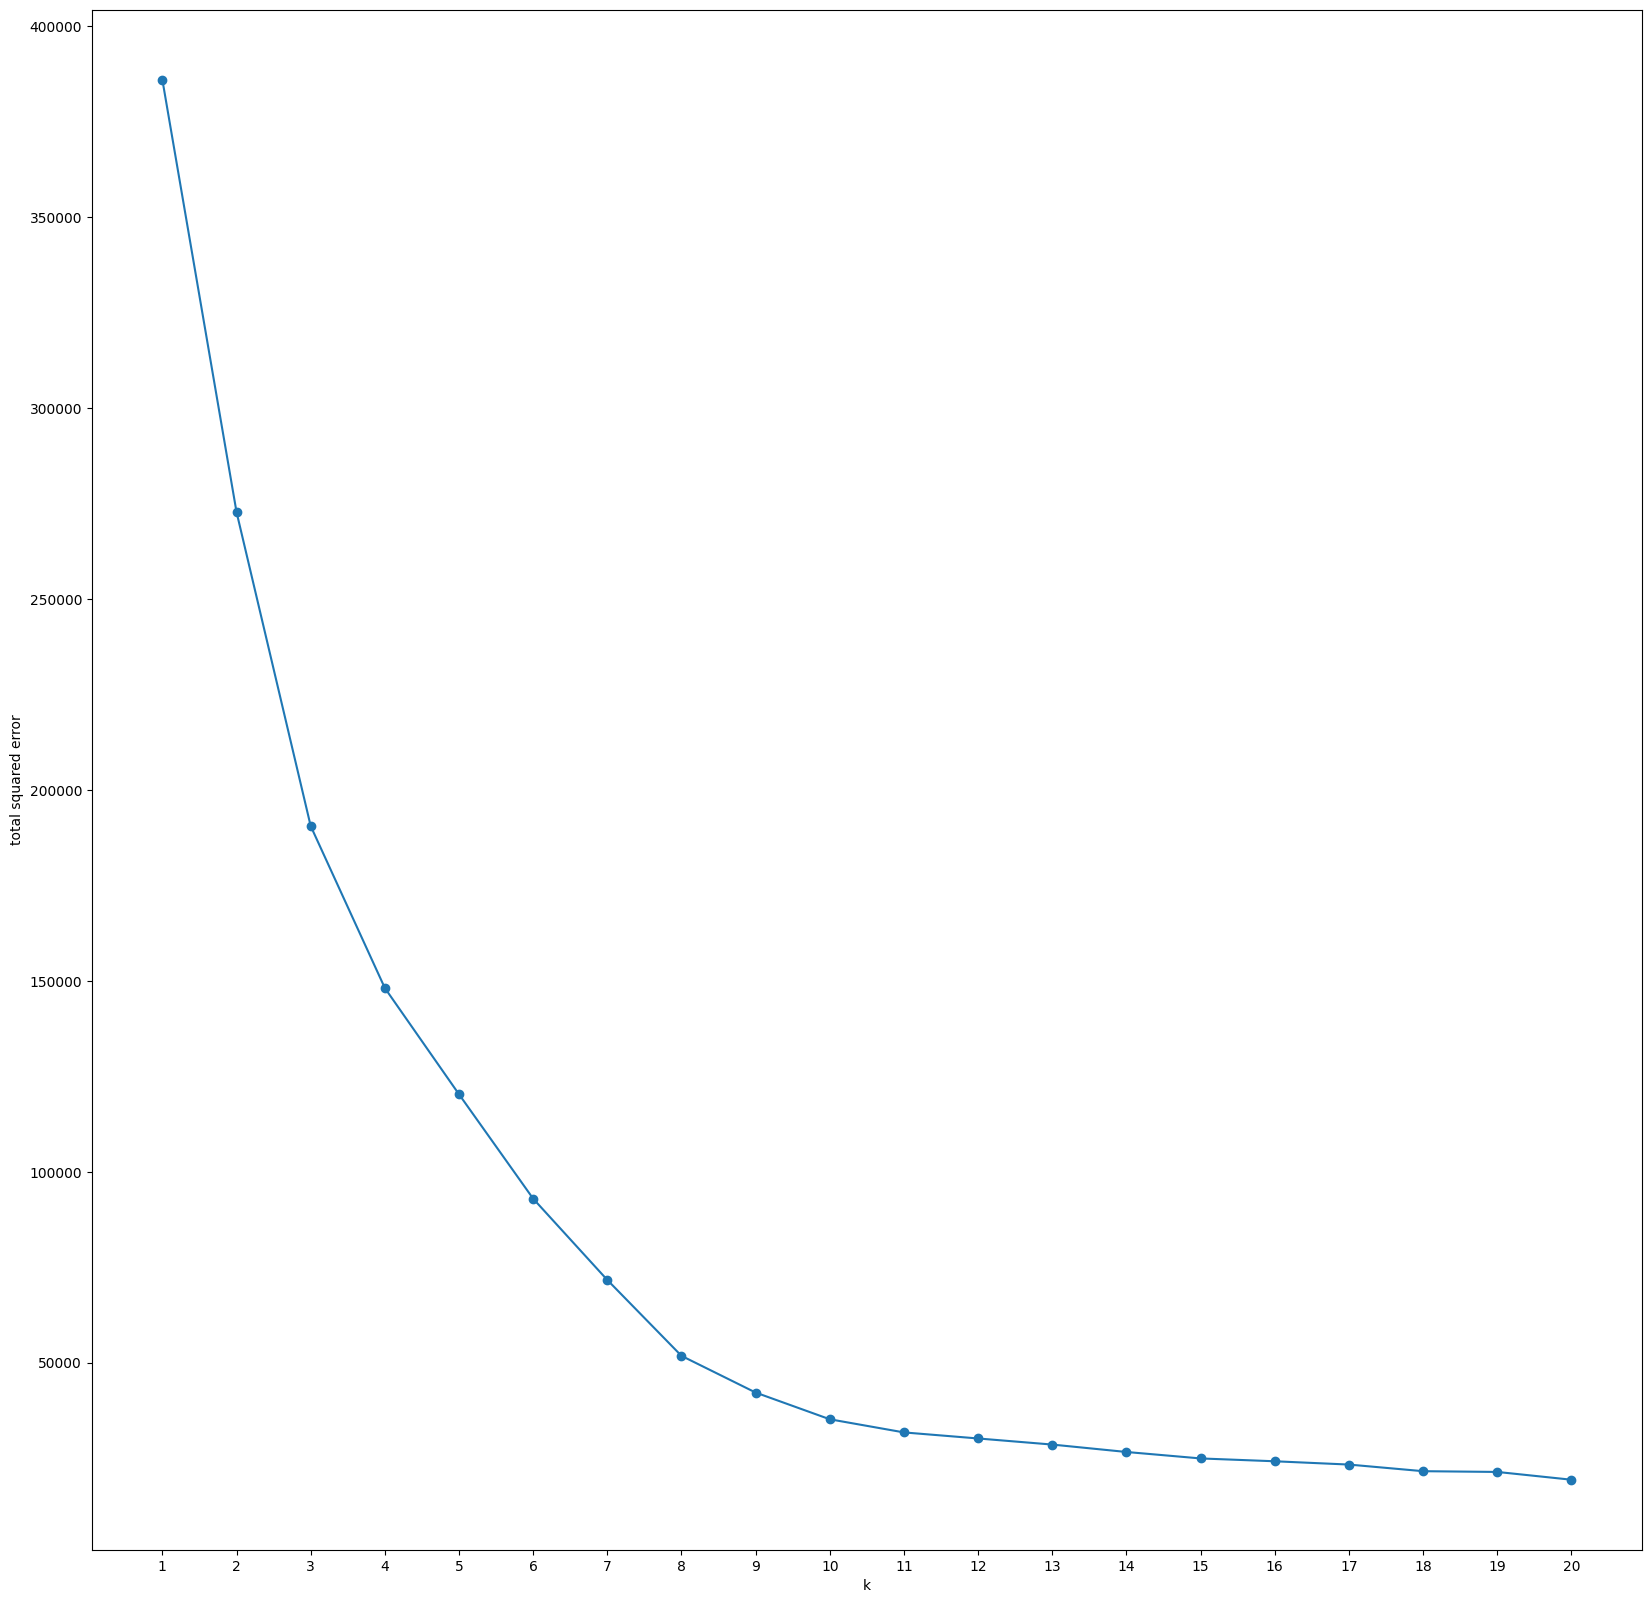

In [ ]:
# DO NOT EDIT
plt.figure(figsize=(20,20))
plt.plot(ks3, errors3, '-o')
plt.xticks(ks3)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.show()

### Your output must be similar to the following:
<img src="hw8_1.png">

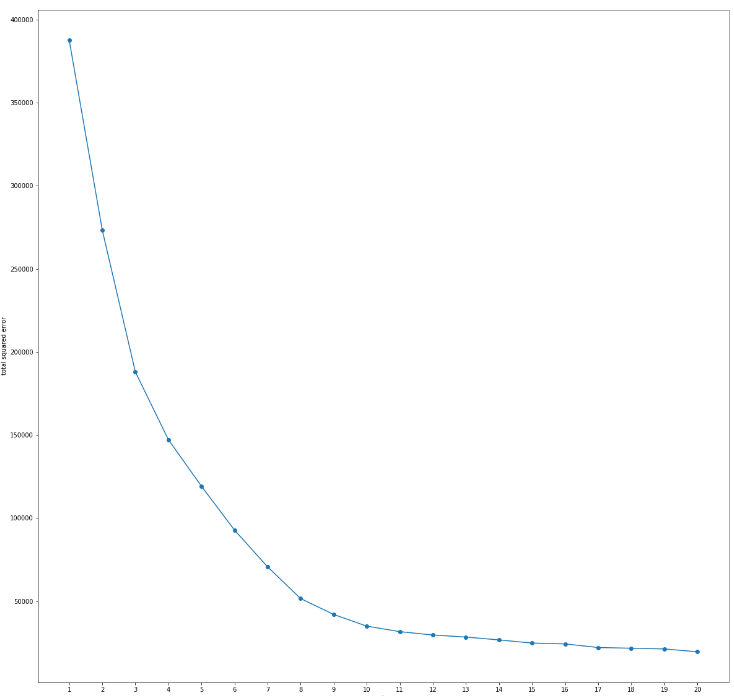

## Problem 3 (40 pts): Recommender implementation : 20

- Make your own implementaion of item-based recommender system
- You may use the code in textbook, but it may be too slow for large datasets.
- You shouldn't import and use any module implementing recommender system directly
- Use cosine similarity for item similarity (Assume that all null values are zero)

- We will use movie rating dataset

- 교재의 코드를 사용할 수 있지만, 큰 데이터셋에 대해서는 너무 느릴 수 있습니다.
- 추천 시스템을 구현하는 모듈을 직접 가져와서 사용하면 안 됩니다.
- 아이템 유사도는 코사인 유사도를 사용하세요 (모든 null 값은 0으로 가정합니다).

- 우리는 영화 평점 데이터셋을 사용할 것입니다.

In [ ]:
import pandas as pd

movies = pd.read_csv('/content/movies.csv')
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [ ]:
ratings = pd.read_csv('/content/ratings.csv')
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
ratings.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

In [ ]:
(ratings['userId']).nunique()

610

In [ ]:
(ratings['movieId']).nunique()

9724

In [ ]:
density = 100836/(610 * 9742)
print('sparsity is {:.2f}%'.format((1 - density)*100))

sparsity is 98.30%


## The following is top 10 recommendations of movie titles and their genres  from top 1 to top 10 for user 1

- 다음은 사용자 1에게 추천된 상위 10개의 영화 제목과 해당 장르입니다.

```
Ferris Bueller's Day Off (1986)                   Comedy              
Die Hard (1988)                                   Action|Crime|Thriller
Breakfast Club, The (1985)                        Comedy|Drama        
Fifth Element, The (1997)                         Action|Adventure|Comedy|Sci-Fi
Aliens (1986)                                     Action|Adventure|Horror|Sci-Fi
Mars Attacks! (1996)                              Action|Comedy|Sci-Fi
Sixth Sense, The (1999)                           Drama|Horror|Mystery
Austin Powers: The Spy Who Shagged Me (1999)      Action|Adventure|Comedy
2001: A Space Odyssey (1968)                      Adventure|Drama|Sci-Fi
Terminator 2: Judgment Day (1991)                 Action|Sci-Fi       
```    

## Find top 10 recommendations of movie titles and their genres from top 1 to top 10 for user 2

- 사용자 2를 위한 상위 10개의 영화 제목과 해당 장르 추천을 찾아보세요.


In [ ]:
!uname -a
# YOUR CODE HERE. You may use as many code cells as you want.
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

class MovieRecommender:
    def __init__(self, ratings_file, movies_file):
        # CSV 파일을 데이터프레임으로 로드
        self.ratings_data = pd.read_csv(ratings_file)
        self.movies_data = pd.read_csv(movies_file)
        self.user_item_matrix = None
        self.similarity_matrix = None

    def prepare_data(self):
        # 사용자-아이템 행렬 생성
        self.user_item_matrix = self.ratings_data.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
        # 아이템 간 유사도 행렬 계산 (코사인 유사도)
        self.similarity_matrix = cosine_similarity(self.user_item_matrix.T)
        # 자기 자신과의 유사도를 0으로 설정
        np.fill_diagonal(self.similarity_matrix, 0)

    def get_recommendations(self, user_id, top_n=10, similarity_threshold=0.3):
        user_ratings = self.user_item_matrix.loc[user_id].values
        movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(self.user_item_matrix.columns)}
        watched_movies = self.ratings_data[self.ratings_data['userId'] == user_id]['movieId'].values

        # 유사도 점수 계산
        scores = np.dot(user_ratings, self.similarity_matrix)
        ranked_movie_indices = np.argsort(scores)[::-1]

        recommendations = []
        for idx in ranked_movie_indices:
            movie_id = self.user_item_matrix.columns[idx]
            similarity_score = self.similarity_matrix[idx].max()
            if similarity_score >= similarity_threshold and movie_id not in watched_movies:
                title = self.movies_data[self.movies_data['movieId'] == movie_id]['title'].values[0]
                genres = self.movies_data[self.movies_data['movieId'] == movie_id]['genres'].values[0]
                recommendations.append((movie_id, title, genres, similarity_score))
                if len(recommendations) >= top_n:
                    break

        return recommendations

    def predict_rating(self, user_id, movie_id):
        user_ratings = self.user_item_matrix.loc[user_id]
        item_similarities = self.similarity_matrix[self.user_item_matrix.columns.get_loc(movie_id)]
        predicted_rating = item_similarities.dot(user_ratings) / np.abs(item_similarities).sum()
        return predicted_rating

    def display_recommendations(self, recommendations):
        for idx, (movie_id, title, genres, score) in enumerate(recommendations, start=1):
            predicted_rating = self.predict_rating(2, movie_id)  # 예측 평점을 계산 (여기서는 user_id=2로 가정)
            print(f"{title:40} {genres}")

Linux ef55de56e8da 6.1.85+ #1 SMP PREEMPT_DYNAMIC Sun Apr 28 14:29:16 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
# 사용 예제
ratings_file = '/content/ratings.csv'
movies_file = '/content/movies.csv'

In [ ]:
# 추천 시스템 학습
recommender = MovieRecommender(ratings_file, movies_file)
recommender.prepare_data()

In [ ]:
# 사용자 2를 위한 추천 생성
recommendations = recommender.get_recommendations(user_id=1, top_n=10)

# 추천된 영화 제목과 장르를 출력
recommender.display_recommendations(recommendations)

Ferris Bueller's Day Off (1986)          Comedy
Die Hard (1988)                          Action|Crime|Thriller
Breakfast Club, The (1985)               Comedy|Drama
Fifth Element, The (1997)                Action|Adventure|Comedy|Sci-Fi
Aliens (1986)                            Action|Adventure|Horror|Sci-Fi
Mars Attacks! (1996)                     Action|Comedy|Sci-Fi
Sixth Sense, The (1999)                  Drama|Horror|Mystery
Austin Powers: The Spy Who Shagged Me (1999) Action|Adventure|Comedy
2001: A Space Odyssey (1968)             Adventure|Drama|Sci-Fi
Terminator 2: Judgment Day (1991)        Action|Sci-Fi


## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- No late homeworks will be accepted (Google classroom will not accept late homework automatically
- Your homework will be graded on the basis of correctness, performance, and programming skills